In [1]:
import xarray as xr
from iwaves.kdv.kdvimex import KdVImEx#from_netcdf
from iwaves.kdv.solve import solve_kdv
import iwaves.utils.initial_conditions as ics

import scipy.signal
import numpy as np
from scipy.interpolate import PchipInterpolator as pchip
import matplotlib.pyplot as plt

%matplotlib inline

from matplotlib import rcParams


In [2]:
L_w = 50000
a_0 = 50
x = np.linspace(0, 2*L_w, 1000)

def full_sine(x, a_0, L_w, x0=0.):
    """
    Full sinusoid, starting at x0 and spanning one wavelength. 
    """
    k = 2*np.pi/L_w
    eta =  -a_0 * np.cos(k*x + k*x0 + np.pi/2)
    eta[x>x0+1*L_w] = 0.
#     #eta[x<x0-4*L_w/2] = 0.
    eta[x<x0] = 0.

    return eta

sine = ics.eta_halfsinepulse(x, a_0, L_w)
fs = full_sine(x, a_0, L_w, x0=L_w/2)


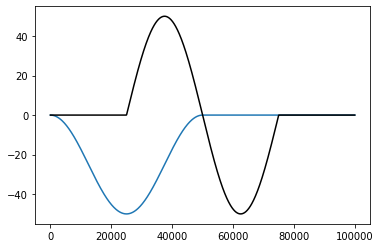

In [3]:
# plt.plot(x, sine)
plt.plot(x, sine)
plt.plot(x, fs, 'k')
# plt.plot(x, fs2+fs, 'r')

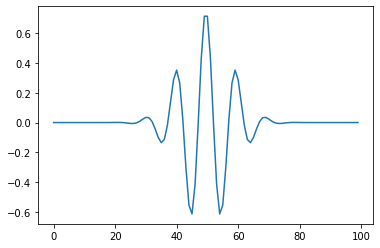

In [18]:
ml = scipy.signal.morlet(100, w=5.0, s=1.0)
plt.plot(ml)